Diabetes Data

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Loading the Dataset**

In [ ]:
patients_data = pd.read_csv('diabetes.csv')
patients_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Exploratory Data Analysis**

In [ ]:
## Data Information
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
##Cheking for missing values
patients_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


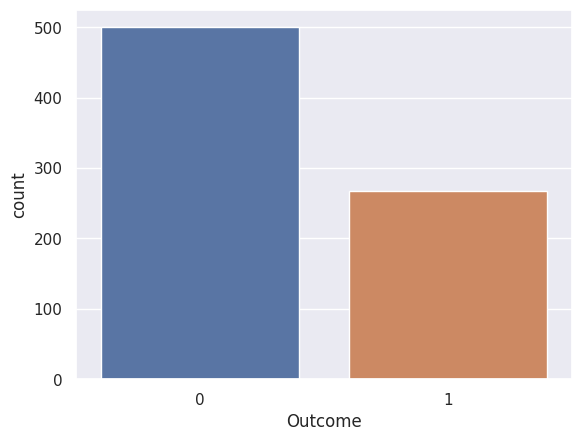

In [ ]:
##Identifying the Number of Diabetic and Non-Daibetic Patients based on the Outcome and Visualizing it
sns.countplot(data=patients_data, x='Outcome');
print(patients_data['Outcome'].value_counts())

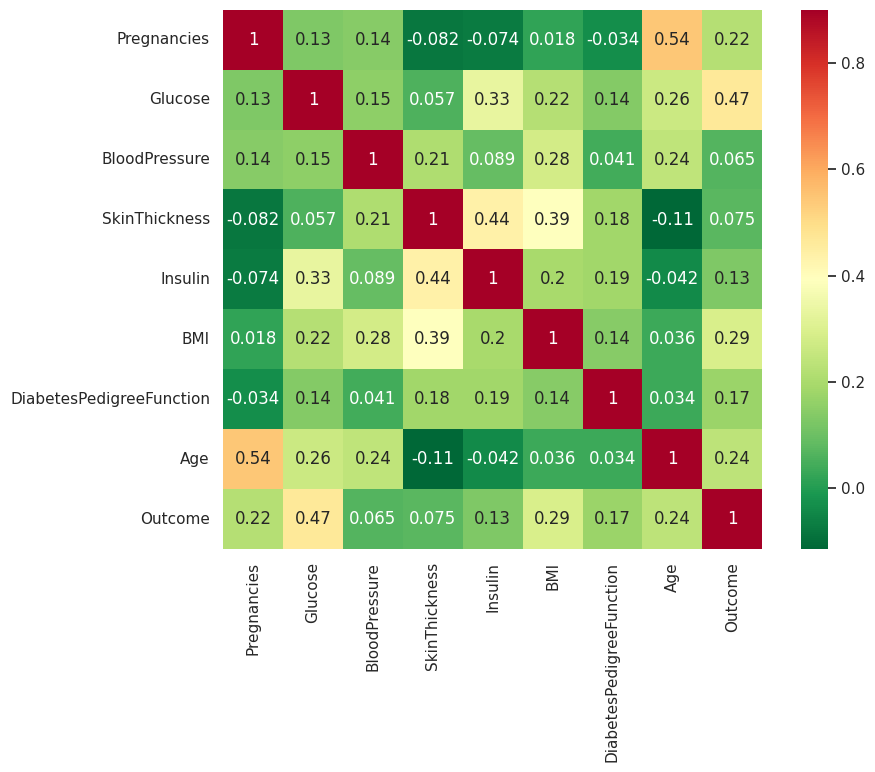

In [ ]:
## Displaying Correlation amongst the features Using Correlation Matrix 
cormatx = patients_data.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(cormatx, annot=True, vmax=0.9, square=True,cmap='RdYlGn_r')
plt.show();

In [ ]:
##Statistical Data of the dataset
patients_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for the unusual Zero values in the data

In [ ]:
(patients_data == 0).any(axis =0)
##There are Zero values in the columns from 'Pregnancy' allthrough to 'BMI' as well as in the 'Outcome' supposed to be missing values
# The 0 values in 'Pregnancy' is possible as the dataset is not gender specific and therefore pregnancy can have a Zero value
# for males. Also, the zero value in Insulin is possible for diabetic patients but given the frequency, it will be treated as missing value.  
# The Zero value in "Outcome'which denotes 'not diabetic' will not be treated as missing value. Hence, the zeros are in these 2 columns are not unusual and need not be replaced.

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [ ]:
#Knowing how many Zero values are in each of the affected columns
patients_data.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# Replacing the zero values with NAN in the relevant Columns
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

patients_data[columns] = patients_data[columns].replace(['0', 0], np.nan)
patients_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
## Confirming if all the Zero values were replaced in the relevant columns
(patients_data.eq(0).any())

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [ ]:
## Checking for the missing Values in the data
patients_data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
## checking for missing Values count per variable
patients_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Handling missing Values in the data

In [ ]:
## Finding the mean values of the different features and replacing the missing values 
# With same

mean_values = patients_data.mean()
patients_data =patients_data.fillna(mean_values)
patients_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Checking for Outliers in the data

In [ ]:
patients_data.quantile(q=[0.25,0.75])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.25,1.0,99.75,64.0,25.0,121.500000,27.5,0.24375,24.0,0.0
0.75,6.0,140.25,80.0,32.0,155.548223,36.6,0.62625,41.0,1.0


In [ ]:
# Calculate the Inter Quantile Range for each feature
q1 = patients_data.quantile(0.25)
q3 = patients_data.quantile(0.75)
iqr = q3 - q1

print("---q1---")
print(q1)
print("\n---q3---")
print(q3)
print("\n---iqr---")
print(iqr)

# Identify the possible outliers using a threshold value for each feature
threshold = 1.5
outliers = []
lower_limit = q1 - threshold * iqr
upper_limit = q3 + threshold * iqr
feature_outliers = patients_data[(patients_data < lower_limit) | (patients_data > upper_limit)].any(axis=1)
feature_outliers
#outliers.append(feature_outliers)
print("Number of outliers identified:", feature_outliers.sum())

---q1---
Pregnancies                   1.00000
Glucose                      99.75000
BloodPressure                64.00000
SkinThickness                25.00000
Insulin                     121.50000
BMI                          27.50000
DiabetesPedigreeFunction      0.24375
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64

---q3---
Pregnancies                   6.000000
Glucose                     140.250000
BloodPressure                80.000000
SkinThickness                32.000000
Insulin                     155.548223
BMI                          36.600000
DiabetesPedigreeFunction      0.626250
Age                          41.000000
Outcome                       1.000000
Name: 0.75, dtype: float64

---iqr---
Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness                7.000000
Insulin                     34.048223
BMI                          9.10

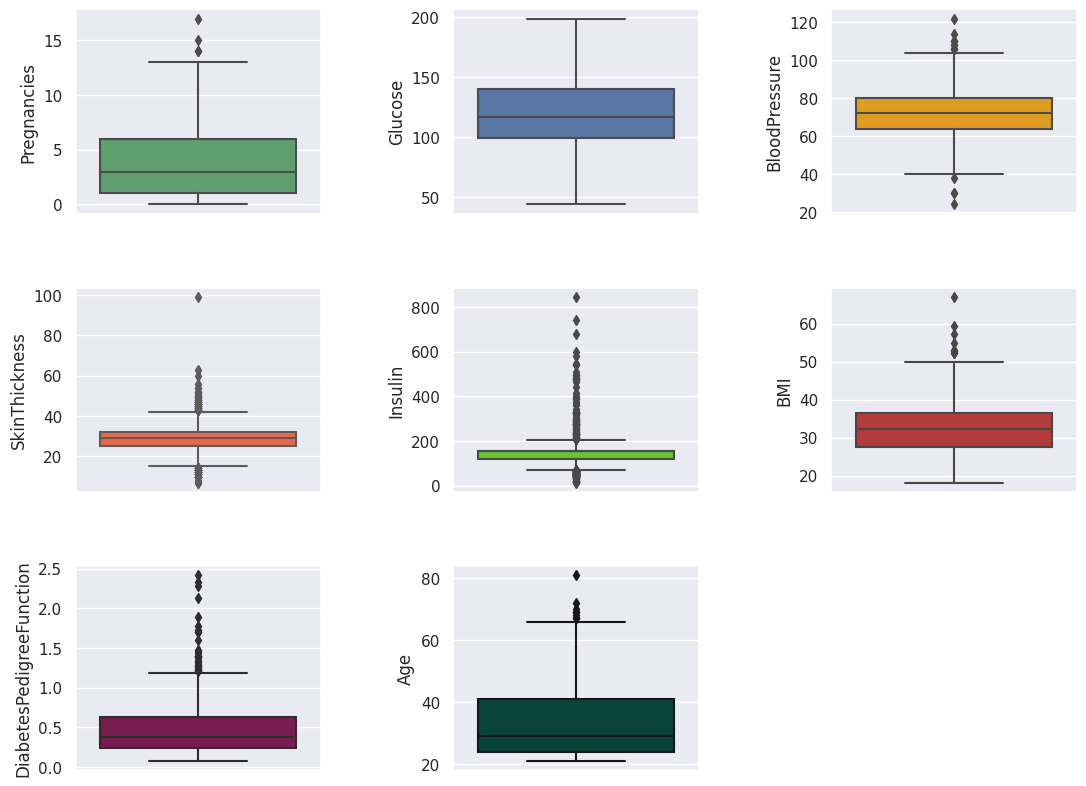

In [ ]:
## Visualizing the outliers in each variable using Boxplot
plt.figure(figsize=(12,9))

plt.subplot(3,3,1)
sns.boxplot(y = patients_data['Pregnancies'], color ="g")

plt.subplot(3,3,2)
sns.boxplot(y = patients_data['Glucose'], color = "b")

plt.subplot(3,3,3)
sns.boxplot(y = patients_data['BloodPressure'], color = 'orange')

plt.subplot(3,3,4)
sns.boxplot(y = patients_data['SkinThickness'], color = '#FF5733')

plt.subplot(3,3,5)
sns.boxplot(y = patients_data['Insulin'], color = '#64DD17')

plt.subplot(3,3,6)
sns.boxplot(y = patients_data['BMI'], color = '#C62828')

plt.subplot(3,3,7)
sns.boxplot(y = patients_data['DiabetesPedigreeFunction'], color = '#880E4F')

plt.subplot(3,3,8)
sns.boxplot(y = patients_data['Age'], color = '#004D40')

plt.tight_layout(pad=4)


**Defining the Predictor Variables and Predicted variable**

In [ ]:
X = patients_data.drop(columns = 'Outcome', axis=1)
Y = patients_data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


**Splitting the dataset into Train and Test sets**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/3, random_state =35)

In [ ]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
51             1    101.0           50.0       15.00000   36.000000  24.2   
722            1    149.0           68.0       29.00000  127.000000  29.3   
26             7    147.0           76.0       29.15342  155.548223  39.4   
622            6    183.0           94.0       29.15342  155.548223  40.8   
189            5    139.0           80.0       35.00000  160.000000  31.6   
..           ...      ...            ...            ...         ...   ...   
249            1    111.0           86.0       19.00000  155.548223  30.1   
448            0    104.0           64.0       37.00000   64.000000  33.6   
33             6     92.0           92.0       29.15342  155.548223  19.9   
271            2    108.0           62.0       32.00000   56.000000  25.2   
713            0    134.0           58.0       20.00000  291.000000  26.4   

     DiabetesPedigreeFunction  Age  
51                      0.526   26  
7

In [ ]:
print(Y_train)

51     0
722    1
26     1
622    0
189    1
      ..
249    0
448    1
33     0
271    0
713    0
Name: Outcome, Length: 512, dtype: int64


In [ ]:
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
78             0    131.0      72.405184       29.15342  155.548223  43.2   
193           11    135.0      72.405184       29.15342  155.548223  52.3   
77             5     95.0      72.000000       33.00000  155.548223  37.7   
336            0    117.0      72.405184       29.15342  155.548223  33.8   
752            3    108.0      62.000000       24.00000  155.548223  26.0   
..           ...      ...            ...            ...         ...   ...   
107            4    144.0      58.000000       28.00000  140.000000  29.5   
146            9     57.0      80.000000       37.00000  155.548223  32.8   
743            9    140.0      94.000000       29.15342  155.548223  32.7   
6              3     78.0      50.000000       32.00000   88.000000  31.0   
239            0    104.0      76.000000       29.15342  155.548223  18.4   

     DiabetesPedigreeFunction  Age  
78                      0.270   26  
1

In [ ]:
print(Y_test)

78     1
193    1
77     0
336    0
752    0
      ..
107    0
146    0
743    1
6      1
239    0
Name: Outcome, Length: 256, dtype: int64


**Future Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)
print(X_train.shape,X_test.shape)

(512, 8) (256, 8)


Training the Decison Tree Classification model on the training set

In [ ]:
X_train_dc = X_train.copy()
X_test_dc = X_test.copy()
Y_train_dc = Y_train.copy()
Y_test_dc = Y_test.copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_dc, Y_train_dc)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results using decision tree model
Dectree_pred = classifier.predict(X_test_dc)

Evaluating the Decision tree Model

[[132  39]
 [ 47  38]]
accuracy score:  0.6640625
F1 score:  0.4691358024691358
Precision score:  0.4935064935064935
Recall score:  0.4470588235294118


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

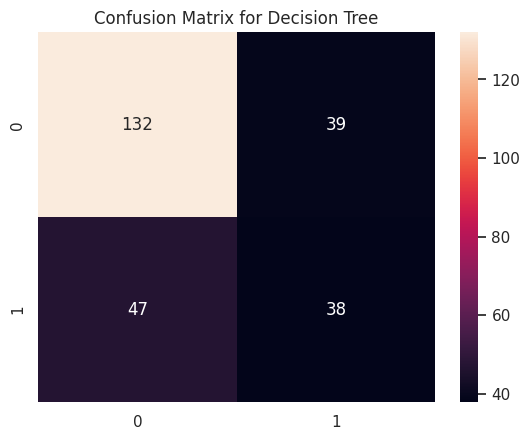

In [ ]:
#Confusion matrix, f1_score, Precision score and accuracy score of the model on the training data
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score, roc_curve,roc_auc_score
conmatx = confusion_matrix(Y_test, Dectree_pred)
print(conmatx)
print("accuracy score: ", accuracy_score(Y_test, Dectree_pred))
print('F1 score: ', f1_score(Y_test,Dectree_pred))
print('Precision score: ', precision_score(Y_test,Dectree_pred))
print('Recall score: ', recall_score(Y_test,Dectree_pred))
sns.heatmap(conmatx, annot=True, fmt= '.0f')
plt.title('Confusion Matrix for Decision Tree')

In [ ]:
# Extracting the features of the Confusion Matrix and evaluating the Sensitivity and Specificity of the Decision Tree model
conmatx_tp,conmatx_tn,conmatx_fp,conmatx_fn =conmatx.flatten()
Dectree_Sensitivity = conmatx_tp / (conmatx_tp + conmatx_tn) 
Dectree_Specificity = conmatx_tn / (conmatx_tn + conmatx_fp)
print('Decision Tree Sensitivity: {:.2f}'.format(Dectree_Sensitivity*100))
print('Decision Tree Specificity: {:.2f}'.format(Dectree_Specificity*100))

Decision Tree Sensitivity: 77.19
Decision Tree Specificity: 45.35


The Decision tree model has a specificity of 0.4535, which means it correctly identified 45.4% of the patients who do not have the disease. It also has a sensitivity of 0.7719, which means it correctly identified 77.2% of the patients who have the disease.

Training the Random Forest Regression Model on the training set

In [ ]:
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
Y_train_rf = Y_train.copy()
Y_test_rf = Y_test.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=100, random_state = 5)
rfclassifier.fit(X_train_rf, Y_train_rf)

RandomForestClassifier(random_state=5)

In [ ]:
# Making Prediction with the Test set data
rfX_prediction = rfclassifier.predict(X_test_rf)

Evaluating the Random Forest Model

[[147  24]
 [ 42  43]]
accuracy score:  0.7421875
F1 score:  0.5657894736842106
Precision score:  0.6417910447761194
Recall score:  0.5058823529411764


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

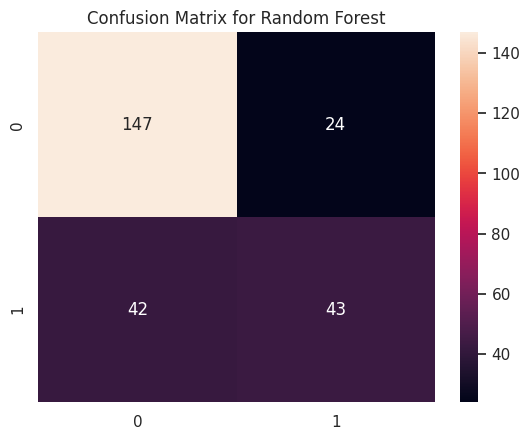

In [ ]:
#Confusion matrix, f1_score, Precision score and accuracy score of the model on the training data
conmatx1 = confusion_matrix(Y_test_rf, rfX_prediction)
print(conmatx1)
print("accuracy score: ", accuracy_score(Y_test_rf, rfX_prediction))
print('F1 score: ', f1_score(Y_test_rf,rfX_prediction))
print('Precision score: ', precision_score(Y_test_rf,rfX_prediction))
print('Recall score: ', recall_score(Y_test_rf,rfX_prediction))
sns.heatmap(pd.DataFrame(conmatx1), annot=True, fmt= '.0f')
plt.title('Confusion Matrix for Random Forest')

In [ ]:
# Extracting the features of the Confusion Matrix and evaluating the Sensitivity and Specificity of the Random Forest model
conmatx1_tp,conmatx1_tn,conmatx1_fp,conmatx1_fn =conmatx1.flatten()
RandomFC_Sensitivity = conmatx1_tp / (conmatx1_tp + conmatx1_tn) 
RandomFC_Specificity = conmatx1_tn / (conmatx1_tn + conmatx1_fp)
print('Random Forest classifier Sensitivity: {:.2f}'.format(RandomFC_Sensitivity*100))
print('Random Forest Classifier Specificity: {:.2f}'.format(RandomFC_Specificity*100))

Random Forest classifier Sensitivity: 85.96
Random Forest Classifier Specificity: 36.36


The Random Forest model has a specificity of 0.3636, which means it correctly identified 36.4% of the patients who do not have the disease. It also has a sensitivity of 0.8596, which means it correctly identified 86% of the patients who have the disease.

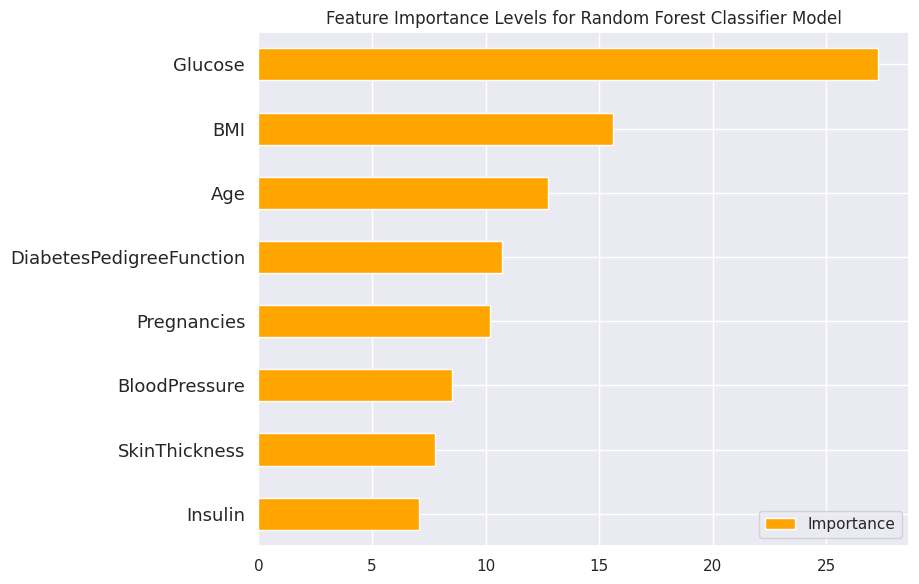

In [ ]:
# Evaluating the importance of the features and vsualizing them
Importance_level =pd.DataFrame({"Importance": rfclassifier.feature_importances_*100},index=X.columns)
Importance_level.nlargest(n=10,columns="Importance").sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh",figsize=(9, 6),color="orange")
plt.title("Feature Importance Levels for Random Forest Classifier Model");
plt.tight_layout()
plt.yticks(fontsize=13)
plt.show()

Training the Logistic Regression model on the Training Set

In [ ]:
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()
Y_train_lr = Y_train.copy()
Y_test_lr = Y_test.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
logregn = LogisticRegression(random_state=0)
logregn.fit(X_train_lr,Y_train_lr)


LogisticRegression(random_state=0)

In [ ]:
# Probabilities and Prediction for the Test set
Y_test_prediction = logregn.predict(X_test_lr)

Evaluating the Logistic Regression Model

[[149  22]
 [ 42  43]]
accuracy score:  0.75
F1 score:  0.5733333333333334
Precision score:  0.6615384615384615
Recall score:  0.5058823529411764


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

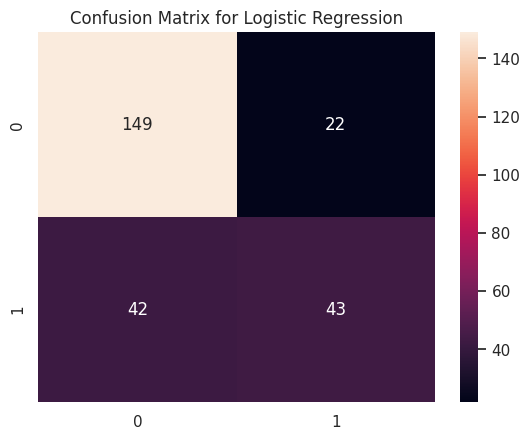

In [ ]:
# Confusion matrix, f1_score, Precision score and accuracy score of the model on the training data
conmatx2 = confusion_matrix(Y_test_lr,Y_test_prediction)
print(conmatx2)
print("accuracy score: ", accuracy_score(Y_test_lr,Y_test_prediction))
print('F1 score: ', f1_score(Y_test_lr,Y_test_prediction))
print('Precision score: ', precision_score(Y_test_lr,Y_test_prediction))
print('Recall score: ', recall_score(Y_test_lr,Y_test_prediction))
sns.heatmap(pd.DataFrame(conmatx2), annot=True, fmt= '.0f')
plt.title('Confusion Matrix for Logistic Regression')

In [ ]:
# Extracting the features of the Confusion Matrix and evaluating the Sensitivity and Specificity of the Logistic Regression model
conmatx2_tp,conmatx2_tn,conmatx2_fp,conmatx2_fn =conmatx2.flatten()
Logreg_Sensitivity = conmatx2_tp / (conmatx2_tp + conmatx2_tn) 
Logreg_Specificity = conmatx2_tn / (conmatx2_tn + conmatx2_fp)
print('Logistic Regression Sensitivity: {:.2f}'.format(Logreg_Sensitivity*100))
print('Logistic Regression Specificity: {:.2f}'.format(Logreg_Specificity*100))

Logistic Regression Sensitivity: 87.13
Logistic Regression Specificity: 34.38


The Logistic Regression model has a specificity of 0.3438, which means it correctly identified 34.4% of the patients who do not have the disease. It also has a sensitivity of 0.8713, which means it correctly identified 87.1% of the patients who have the disease.

Training the K-Nearest Neighbors Model on the Traning set

In [ ]:
X_train_kn = X_train.copy()
X_test_kn = X_test.copy()
Y_train_kn = Y_train.copy
Y_test_kn = Y_test.copy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train, Y_train)

In [ ]:
# Probabilities and making Prediction with the Test set data
knn_prediction = knn_model.predict(X_test_kn)

Evaluating the K-NN Model

[[135  36]
 [ 40  45]]
accuracy score:  0.703125
F1 score:  0.5421686746987951
Precision score:  0.5555555555555556
Recall score:  0.5294117647058824


Text(0.5, 1.0, 'Confusion Matrix for KNN')

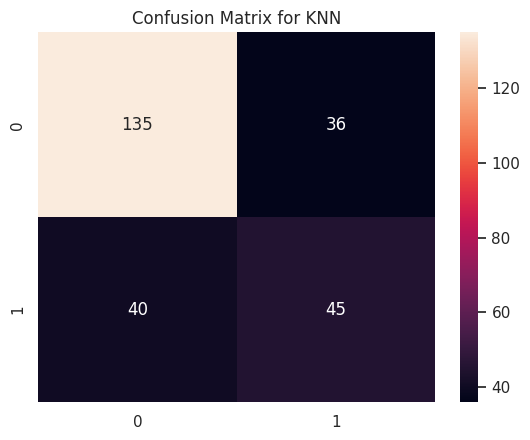

In [ ]:
#Confusion matrix, f1_score, Precision score and accuracy score of the model on the training data
conmatx3 = confusion_matrix(Y_test_kn,knn_prediction)
print(conmatx3)
print("accuracy score: ", accuracy_score(Y_test_kn,knn_prediction))
print('F1 score: ', f1_score(Y_test_kn,knn_prediction))
print('Precision score: ', precision_score(Y_test_kn,knn_prediction))
print('Recall score: ', recall_score(Y_test_kn,knn_prediction))
sns.heatmap(pd.DataFrame(conmatx3), annot=True, fmt= '.0f')
plt.title('Confusion Matrix for KNN')

In [ ]:
# Extracting the features of the Confusion Matrix and evaluating the Sensitivity and Specificity of the KNN model
conmatx3_tp,conmatx3_tn,conmatx3_fp,conmatx3_fn =conmatx3.flatten()
Knn_Sensitivity = conmatx3_tp / (conmatx3_tp + conmatx3_tn) 
Knn_Specificity = conmatx3_tn / (conmatx3_tn + conmatx3_fp)
print('KNN Sensitivity: {:.2f}'.format(Knn_Sensitivity*100))
print('KNN Specificity: {:.2f}'.format(Knn_Specificity*100))

KNN Sensitivity: 78.95
KNN Specificity: 47.37


The KNN model has a specificity of 0.4737, which means it correctly identified 47.4% of the patients who do not have the disease. It also has a sensitivity of 0.7895, which means it correctly identified 79% of the patients who have the disease.

Training the Support Vector Machine Model on the Traning set

In [ ]:
X_train_sv = X_train.copy()
X_test_sv = X_test.copy()
Y_train_sv = Y_train.copy()
Y_test_sv = Y_test.copy()

In [ ]:
from sklearn.svm import SVC
sv_classifier =SVC(kernel = 'linear', probability=True, random_state =0)
sv_classifier.fit(X_train_sv, Y_train_sv)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# Probabilities and making Prediction with the Test set data
svm_prediction = sv_classifier.predict(X_test_sv)

Evaluating the SVM Model

[[149  22]
 [ 44  41]]
accuracy score:  0.7421875
F1 score:  0.5540540540540541
Precision score:  0.6507936507936508
Recall score:  0.4823529411764706


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Model')

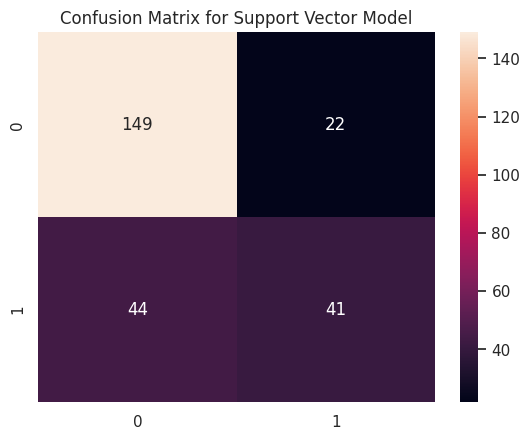

In [ ]:
# Confusion matrix, f1_score, Precision score and accuracy score of the model on the training data
conmatx4 = confusion_matrix(Y_test_sv,svm_prediction)
print(conmatx4)
print("accuracy score: ", accuracy_score(Y_test_sv,svm_prediction))
print('F1 score: ', f1_score(Y_test_sv,svm_prediction))
print('Precision score: ', precision_score(Y_test_sv,svm_prediction))
print('Recall score: ', recall_score(Y_test_sv,svm_prediction))
sns.heatmap(pd.DataFrame(conmatx4), annot=True, fmt= '.0f')
plt.title('Confusion Matrix for Support Vector Model')

In [ ]:
# Extracting the features of the Confusion Matrix and evaluating the Sensitivity and Specificity of the SVM model
conmatx4_tp,conmatx4_tn,conmatx4_fp,conmatx4_fn =conmatx4.flatten()
SVM_Sensitivity = conmatx4_tp / (conmatx4_tp + conmatx4_tn) 
SVM_Specificity = conmatx4_tn / (conmatx4_tn + conmatx4_fp)
print('SVM Sensitivity: {:.2f}'.format(SVM_Sensitivity*100))
print('SVM Specificity: {:.2f}'.format(SVM_Specificity*100))

SVM Sensitivity: 87.13
SVM Specificity: 33.33


The Support Vector Machine model has a specificity of 0.3333, which means it correctly identified 33.3% of the patients who do not have the disease. It also has a sensitivity of 0.8713, which means it correctly identified 87.1% of the patients who have the disease.

 Training the Naive Bayes Model on the training data

In [ ]:
X_train_nb = X_train.copy()
X_test_nb = X_test.copy()
Y_train_nb = Y_train.copy()
Y_test_nb = Y_test.copy()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_nb, Y_train_nb)

GaussianNB()

In [ ]:
# Making Prediction with the Test set data
nb_prediction = nb_classifier.predict(X_test_nb)

Evaluating the Naive Bayes Model

[[139  32]
 [ 39  46]]
accuracy score:  0.72265625
F1 score:  0.5644171779141104
Precision score:  0.5897435897435898
Recall score:  0.5411764705882353


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Model')

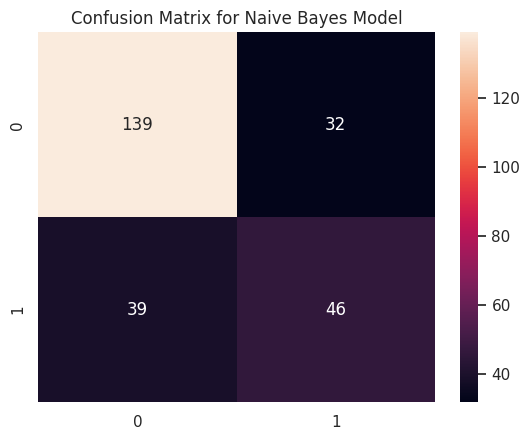

In [ ]:
conmatx5 = confusion_matrix(Y_test_nb,nb_prediction)
print(conmatx5)

print("accuracy score: ", accuracy_score(Y_test_nb,nb_prediction))

print('F1 score: ', f1_score(Y_test_nb,nb_prediction))
print('Precision score: ', precision_score(Y_test_nb,nb_prediction))
print('Recall score: ', recall_score(Y_test_nb,nb_prediction))
sns.heatmap(pd.DataFrame(conmatx5), annot=True, fmt= '.0f')
plt.title('Confusion Matrix for Naive Bayes Model')

In [ ]:
# Extracting the features of the Confusion Matrix and evaluating the Sensitivity and Specificity of the Naive Bayes model
conmatx5_tp,conmatx5_tn,conmatx5_fp,conmatx5_fn =conmatx5.flatten()
NaiveB_Sensitivity = conmatx5_tp / (conmatx5_tp + conmatx5_tn) 
NaiveB_Specificity = conmatx5_tn / (conmatx5_tn + conmatx5_fp)
print('Naive Bayes Sensitivity: {:.2f}'.format(NaiveB_Sensitivity*100))
print('Naive Bayes Specificity: {:.2f}'.format(NaiveB_Specificity*100))

Naive Bayes Sensitivity: 81.29
Naive Bayes Specificity: 45.07


The Naive Bayes model has a specificity of 0.4507, which means it correctly identified 45.1% of the patients who do not have the disease. It also has a sensitivity of 0.8129, which means it correctly identified 81.3% of the patients who have the disease.

Comparing the different Models

**Using the Accuracy Score (10-fold Cross-Validation)**

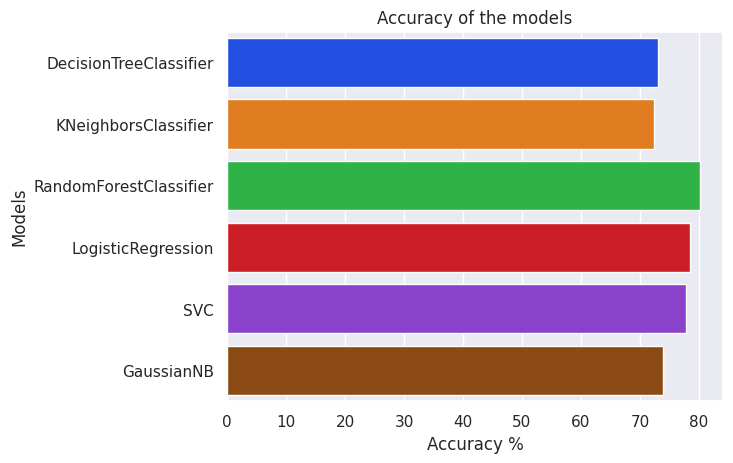

In [ ]:
import warnings
warnings.filterwarnings('ignore')
models = [classifier,knn_model,rfclassifier,logregn,sv_classifier,nb_classifier]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,Y_test,cv=10,scoring="accuracy").mean()  
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)

sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="bright")
plt.xlabel('Accuracy %')

plt.title('Accuracy of the models');


In [ ]:
results.sort_values(by="Accuracy",ascending=False)
#RandomForestClassifier has performed the best with accuracy level of 80.11%
#LogisticRegression has performed the second best with accuracy level of 78.51%
#SupportVectorModel has performed the third best with accuracy level of 77.75%

,Models,Accuracy
0,RandomForestClassifier,80.107692
0,LogisticRegression,78.507692
0,SVC,77.753846
0,GaussianNB,73.861538
0,DecisionTreeClassifier,73.076923
0,KNeighborsClassifier,72.307692


**Using F-Score (10-fold cross-Validation)**

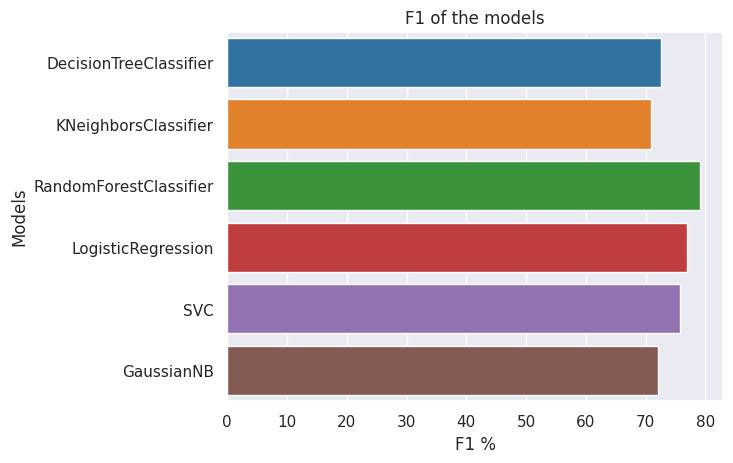

In [ ]:
models = [classifier,knn_model,rfclassifier,logregn,sv_classifier,nb_classifier]

result = []
results3 = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,Y_test,cv=10,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results3 = results3.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results3, palette="tab10")
plt.xlabel('F1 %')
plt.title('F1 of the models');



In [ ]:
results3.sort_values(by="F1",ascending=False)
#Random Forest Classifier has performed the best based on f1-score of 79.00%
#Logistic Regression has performed the second best based on f1-score of 76.94%
#Support Vector Classifier has performed the third best based on f1-score of 75.81%

,Models,F1
0,RandomForestClassifier,79.004423
0,LogisticRegression,76.945037
0,SVC,75.807560
0,DecisionTreeClassifier,72.521438
0,GaussianNB,72.000770
0,KNeighborsClassifier,70.939365


**Grouping Based on the Sensitivity and Specificity of the Models**

In [ ]:
from tabulate import tabulate
# Storing the data in Dictionary
data = {"Models": ["Decision Tree","Randomforestclassifier","Logreg Classifier","Kn Neighbor_classifier","SV_classifier","NB_classifier"],
"Sensitivity": [Dectree_Sensitivity,RandomFC_Sensitivity,Logreg_Sensitivity,Knn_Sensitivity,SVM_Sensitivity,NaiveB_Sensitivity],
"Specificity": [Dectree_Specificity,RandomFC_Specificity,Logreg_Specificity,Knn_Specificity,SVM_Specificity,NaiveB_Specificity]}

# Convert the dictionary to list of lists
data_list = [list(values) for values in zip(*data.values())]
#Assigning column headers
columns= ["Models","Sensitivity","Specificity"]

print(tabulate(data_list, headers=columns))


Models                    Sensitivity    Specificity
----------------------  -------------  -------------
Decision Tree                0.77193        0.453488
Randomforestclassifier       0.859649       0.363636
Logreg Classifier            0.871345       0.34375
Kn Neighbor_classifier       0.789474       0.473684
SV_classifier                0.871345       0.333333
NB_classifier                0.812865       0.450704


Predicting if an Individual will develop diabetes over the next 5 years using the Logistic Regression Classifier Model 

In [ ]:
# #Making the prediction using the following assumed features
input_data=(4,110,92,25.1,111,37.6,0.191,30)

In [ ]:
# #changing the input data to numpy array 
input_data_as_numpy_array=np.asarray(input_data)
# #Reshaping the array as the prediction is for one instance 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


In [ ]:
# #standardize the input data
std_data=scaled.transform(input_data_reshaped)
print(std_data)
prediction=logregn.predict(std_data)

print(prediction)
if (prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.07223199 -0.41950793  1.58450856 -0.4665164  -0.51679586  0.67339282
  -0.85211281 -0.25655263]]
[0]
The person is not diabetic


In [ ]:
# #Making the prediction for 5 years time using the same assumed features except for change in age
input_data2=(4,110,92,25.1,111,37.6,0.191,35)

 #changing the input data to numpy array 
data_as_np_array=np.asarray(input_data2)
# #Reshaping the array
data_reshape=data_as_np_array.reshape(1,-1)

#standardize the input data
std_data2=scaled.transform(data_reshape)

prediction2 = logregn.predict(std_data2)

print(prediction2)
if (prediction2[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic
